In [1]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper

### Connect to API and scrape the data needed
#### get the access token and 200 response 

In [2]:
def get_api():   
    url = env.get_db_url()
    response = requests.post(url)
    data = response.json()
    access_token = data['access_token']
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *;'
    r = requests.post('https://api.igdb.com/v4/games', data=data, headers=headers)
    return access_token, r

In [3]:
access_token = acquire.connect_api()

In [4]:
#access_token

In [5]:
tf = acquire.connect_to_games()

In [6]:
tf

<Response [200]>

In [7]:
wrapper = acquire.run_wrapper()

In [8]:
wrapper

In [9]:
game_library = acquire.get_game_library(wrapper)
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,...,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[31],Martha Is Dead: Digital Deluxe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.platforms.tail(10).values[0]

## scraping endpoints
### scrape the end points of each category 

In [ ]:
access_token


In [ ]:
df.head()

### platform_families

In [10]:
def get_platform_families():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_families' ,data=data ,  headers=headers)
    platform_families = wrapper.api_request('platform_families', 'fields *;limit 500;')
    x = json.loads(platform_families)
    platform_families =pd.DataFrame(x)
    return platform_families

In [11]:
platform_families = get_platform_families()
platform_families.head()

,id,name,slug,checksum
0,5,Nintendo,nintendo,398e5c87-f7db-6265-6da6-433441385208
1,4,Linux,linux,be8b89fa-823c-790a-1d5a-7e74315c1b27
2,2,Xbox,xbox,5bb9bcec-4aa7-45b8-129b-a6f88932942e
3,3,Sega,sega,bd1a9cc4-3632-33b0-ff4b-feab8cd15001
4,1,PlayStation,playstation,eadc0208-7972-9364-88b9-d2a9de75a998


In [12]:
df.columns

NameError: name 'df' is not defined

### platform_version_release_dates

In [13]:
def get_platform_version_release():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_release_dates' ,data=data ,  headers=headers)
    platform_version_release_dates = wrapper.api_request('platform_version_release_dates', 'fields *;limit 500;')
    x = json.loads(platform_version_release_dates)
    platform_version_release_dates =pd.DataFrame(x)
    return platform_version_release_dates

In [14]:
platform_version_release_dates = get_platform_version_release()
platform_version_release_dates

,id,category,date,human,m,region,y,checksum,updated_at
0,555,2,567907200,1987,12,8,1987,186c07ec-0d93-dc0f-6c4a-5fdb5a6138fa,NaN
1,338,0,1189555200,"Sep 12, 2007",9,3,2007,15e5b0aa-5bb6-ef30-ee85-0ef94cb3581f,NaN
2,334,0,1125532800,"Sep 01, 2005",9,7,2005,a4c921d5-1894-9a40-d20f-05959cd69a38,NaN
3,331,0,1415923200,"Nov 14, 2014",11,3,2014,3ebb8dc8-b8fa-f11a-b729-228b9dac35c4,NaN
4,333,0,1389830400,"Jan 16, 2014",1,7,2014,a15ecea5-cb71-916f-5bec-66ad7f571b19,NaN
...,...,...,...,...,...,...,...,...,...
393,661,2,725760000,1992,12,8,1992,d6cb796b-0679-d99b-30d8-decdf573187d,1.660320e+09
394,662,0,945043200,"Dec 13, 1999",12,5,1999,6fa54af0-85f8-088f-294c-d95dbbbb2a70,1.660322e+09
395,663,2,851990400,1996,12,2,1996,86254855-ee73-231a-6fab-9317893d2b30,1.660323e+09
396,671,0,1456272000,"Feb 24, 2016",2,8,2016,3a26664a-ee1c-7d8d-58ad-24fcac7cb66f,1.663687e+09


In [15]:
# drop columns not needed
platform_version_release_dates = platform_version_release_dates.drop(columns=['category', 'date', 'm', 'y', 'region', 'updated_at', 'checksum', 'updated_at'])
platform_version_release_dates.head()


,id,human
0,555,1987
1,338,"Sep 12, 2007"
2,334,"Sep 01, 2005"
3,331,"Nov 14, 2014"
4,333,"Jan 16, 2014"


In [16]:
df.head()

NameError: name 'df' is not defined

In [17]:
version_dates_dict[9] = 'not_available'
version_dates_dict[384] = 'not_available'
version_dates_dict[386] = 'not_available'


NameError: name 'version_dates_dict' is not defined

In [18]:
version_dates_list = platform_version_release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
version_dates_dict = platform_version_release_dates.set_index('game').to_dict()['human']

KeyError: "['game'] not in index"

In [19]:
def test_funct3(random_list):
    if type(random_list) == list:
        return [version_dates_dict[i] for i in random_list]
    else:  
        return "Not available"

In [20]:
platforms.set_index('Locality', inplace=True)
data.set_index('Locality', inplace=True)


NameError: name 'platforms' is not defined

In [21]:
df['release_dates'] = df.release_dates.apply(test_funct3)
df.head()

NameError: name 'df' is not defined

In [22]:
all_release_dates = pd.merge(release_dates, platform_version_release_dates, how = 'inner', on="human")

NameError: name 'release_dates' is not defined

In [23]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head()

NameError: name 'df' is not defined

### platform_version_companies

In [ ]:
def get_platform_version_companies():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_companies' ,data=data ,  headers=headers)
    platform_version_companies = wrapper.api_request('platform_version_companies', 'fields *;limit 500;')
    x = json.loads(platform_version_companies)
    platform_version_companies =pd.DataFrame(x)
    return platform_version_companies

In [ ]:
platform_version_companies=get_platform_version_companies()
platform_version_companies.head()

### platforms (use this)

In [24]:
def get_platforms():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platforms' ,data=data ,  headers=headers)
    platforms = wrapper.api_request('platforms', 'fields *;limit 500;')
    x = json.loads(platforms)
    platforms =pd.DataFrame(x)
    return platforms

In [25]:
platform = get_platforms()
platform.shape

(197, 16)

In [26]:
platform.head()

,id,alternative_name,category,created_at,name,platform_logo,slug,updated_at,url,versions,websites,checksum,generation,platform_family,abbreviation,summary
0,158,Commodore Dynamic Total Vision,6.0,1510012800,Commodore CDTV,292.0,commodore-cdtv,1522972800,https://www.igdb.com/platforms/commodore-cdtv,[223],[26],5d48648e-283c-e2df-df7d-6d3cbc7e0a58,NaN,NaN,NaN,NaN
1,339,Kids Computer Pico,1.0,1595808000,Sega Pico,NaN,sega-pico,1595808000,https://www.igdb.com/platforms/sega-pico,[456],NaN,6e867a5b-a071-fc7b-945b-a0622f64a4bc,4.0,3.0,NaN,NaN
2,8,PS2,1.0,1297555200,PlayStation 2,254.0,ps2,1414972800,https://www.igdb.com/platforms/ps2,"[58, 114]",NaN,be3e025c-d4ed-b795-443c-a8cb55fbfe17,6.0,1.0,PS2,NaN
3,39,NaN,4.0,1317686400,iOS,248.0,ios,1391644800,https://www.igdb.com/platforms/ios,[43],NaN,fefe4a2b-7c90-0e89-e811-902ea1cf2b58,NaN,NaN,iOS,NaN
4,94,NaN,6.0,1414195200,Commodore Plus/4,310.0,c-plus-4,1468454400,https://www.igdb.com/platforms/c-plus-4,[108],NaN,ea138789-6bbe-bcca-dff5-7e20e762f65a,NaN,NaN,C+4,NaN


In [27]:
# see if there is a number in id that matches the big df
platform.loc[platform['id'] == 5]

,id,alternative_name,category,created_at,name,platform_logo,slug,updated_at,url,versions,websites,checksum,generation,platform_family,abbreviation,summary
136,5,Revolution,1.0,1297639288,Wii,326.0,wii,1615884750,https://www.igdb.com/platforms/wii,"[72, 283]",[275],d56c975f-909c-1af3-bdf6-e57c03e11bce,7.0,5.0,Wii,NaN


In [28]:
platform = platform.drop(columns=['alternative_name', 'category', 'created_at', 'platform_logo', 'updated_at', 'url', 'checksum', 'versions', 'websites', 'generation', 'platform_family', 'abbreviation', 'summary'])
platform.head()


,id,name,slug
0,158,Commodore CDTV,commodore-cdtv
1,339,Sega Pico,sega-pico
2,8,PlayStation 2,ps2
3,39,iOS,ios
4,94,Commodore Plus/4,c-plus-4


In [29]:
# looking at the dictionary
print(game_library.get(92, "Not found"))

Not found


In [30]:
game_library.platforms.iloc[2]

[37]

In [31]:
platformlist = platform[['id' , 'name']].sort_values(by='id').reset_index(drop=True)


In [32]:
platform_dict = platformlist.set_index('id').to_dict()['name']

In [33]:
platform_dict[92] = 'not_available'

In [34]:
platform_dict['0'] = 'not_available'

In [35]:
import numpy as np
platform.head()

,id,name,slug
0,158,Commodore CDTV,commodore-cdtv
1,339,Sega Pico,sega-pico
2,8,PlayStation 2,ps2
3,39,iOS,ios
4,94,Commodore Plus/4,c-plus-4


In [36]:
platform_dict

{3: 'Linux',
 4: 'Nintendo 64',
 5: 'Wii',
 6: 'PC (Microsoft Windows)',
 7: 'PlayStation',
 8: 'PlayStation 2',
 9: 'PlayStation 3',
 11: 'Xbox',
 12: 'Xbox 360',
 13: 'DOS',
 14: 'Mac',
 15: 'Commodore C64/128/MAX',
 16: 'Amiga',
 18: 'Nintendo Entertainment System',
 19: 'Super Nintendo Entertainment System',
 20: 'Nintendo DS',
 21: 'Nintendo GameCube',
 22: 'Game Boy Color',
 23: 'Dreamcast',
 24: 'Game Boy Advance',
 25: 'Amstrad CPC',
 26: 'ZX Spectrum',
 27: 'MSX',
 29: 'Sega Mega Drive/Genesis',
 30: 'Sega 32X',
 32: 'Sega Saturn',
 33: 'Game Boy',
 34: 'Android',
 35: 'Sega Game Gear',
 37: 'Nintendo 3DS',
 38: 'PlayStation Portable',
 39: 'iOS',
 41: 'Wii U',
 42: 'N-Gage',
 44: 'Tapwave Zodiac',
 46: 'PlayStation Vita',
 47: 'Virtual Console (Nintendo)',
 48: 'PlayStation 4',
 49: 'Xbox One',
 50: '3DO Interactive Multiplayer',
 51: 'Family Computer Disk System',
 52: 'Arcade',
 53: 'MSX2',
 55: 'Legacy Mobile Device',
 57: 'WonderSwan',
 58: 'Super Famicom',
 59: 'Atari 26

In [37]:
def test_funct(random_list):
    if type(random_list) == list:
        return [platform_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [38]:
print(platform.get('id', "Not found"))

0      158
1      339
2        8
3       39
4       94
      ... 
192    415
193    414
194    412
195    438
196    439
Name: id, Length: 197, dtype: int64


In [39]:
df.platforms.info(10)

NameError: name 'df' is not defined

In [40]:
game_library['platforms'] = game_library.platforms.apply(test_funct)
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[31],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[19],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],NaN,1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],NaN,1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[1],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[1],[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",NaN,1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,NaN,NaN,[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
game_library.loc[game_library['platforms'] == '3ds']

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions


In [42]:
game_library.loc[game_library['platforms'].notnull()]

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[31],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[19],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],NaN,1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],NaN,1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[1],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[1],[2],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",NaN,1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,NaN,NaN,[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,434,"[1344, 44681, 63033, 63034, 63035, 63036, 63037]",[45711],0,120991.0,1300810978,"[25093, 73181, 82161, 92883, 134184, 189687, 2...",1.274141e+09,"[5, 12, 31]",Red Dead Redemption,"[PlayStation 3, Xbox 360]","[88635, 88637, 105164, 105165, 105166]","[1244, 1246, 1248, 3651, 365

### release_dates

In [43]:
def get_release_dates():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/release_dates' ,data=data ,  headers=headers)
    release_dates = wrapper.api_request('release_dates', 'fields *;limit 500;')
    x = json.loads(release_dates)
    release_dates =pd.DataFrame(x)
    return release_dates

In [44]:
release_dates = get_release_dates()
release_dates.shape

(500, 12)

In [45]:
release_dates = release_dates.drop(columns=['category', 'date', 'm', 'region', 'updated_at', 'y', 'checksum', 'created_at', 'platform'])
release_dates.head()

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"


In [46]:
release_dates

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"
...,...,...,...
495,56923,24000,1981
496,76368,1538,"Mar 05, 1998"
497,109086,8673,1990
498,144209,28386,"Mar 13, 2007"


In [47]:
# add to dictionary
release_dict[91007] = "not-available"
release_dict[138333] = "not-available"
release_dict[188385] = "not-available"
release_dict[213594] = "not-available"
release_dict[77755] = "not-available"


NameError: name 'release_dict' is not defined

In [48]:
releaselist = release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
release_dict = releaselist.set_index('game').to_dict()['human']

In [49]:
release_dates.head()

,id,game,human
0,170111,76870,"Mar 19, 2019"
1,165447,115477,"Jun 25, 2019"
2,85558,38035,"Dec 10, 1987"
3,26259,2473,"Mar 19, 2004"
4,310515,48629,"Jan 08, 1990"


In [50]:
def test_funct2(random_list):
    if type(random_list) == list:
        return [release_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [51]:
release_dict

{26: 'Jun 30, 1997',
 65: 'Apr 22, 2010',
 110: '1993',
 330: '1994',
 352: 'Mar 11, 2010',
 357: 'Mar 30, 2000',
 358: 'Jan 05, 2007',
 401: 'Nov 12, 2009',
 416: 'Apr 18, 2006',
 474: 'Mar 27, 2003',
 475: 'Sep 16, 2008',
 485: 'Sep 30, 2008',
 712: 'Jul 29, 2003',
 716: 'Oct 30, 2009',
 841: 'Mar 05, 2002',
 910: 'Apr 10, 2003',
 1022: 'Dec 08, 2006',
 1026: 'Dec 02, 2006',
 1027: 'Jun 08, 2011',
 1090: 'Feb 26, 2015',
 1103: 'May 15, 2013',
 1132: 'Oct 09, 2014',
 1165: 'Mar 10, 2005',
 1207: 'Dec 15, 2005',
 1217: 'Nov 08, 2000',
 1288: '1988',
 1331: 'Jan 20, 2011',
 1364: 'Jul 25, 2012',
 1367: 'Jun 29, 2010',
 1389: 'Mar 14, 2002',
 1429: 'Feb 19, 2008',
 1452: 'Dec 18, 2008',
 1510: 'Jun 19, 2013',
 1538: 'Mar 05, 1998',
 1574: 'Sep 27, 2007',
 1631: 'Jan 30, 2003',
 1648: 'Nov 03, 2010',
 1656: 'Aug 15, 1993',
 1710: 'Jun 28, 2013',
 1735: 'Oct 09, 2013',
 1742: 'Jun 14, 2012',
 1833: 'Apr 23, 2013',
 1884: 'Dec 14, 2000',
 1913: 'Feb 29, 2008',
 1950: 'May 01, 1985',
 2034: 

In [52]:
game_library.release_dates.head()

0    [347234, 347235]
1             [91007]
2            [138333]
3            [188385]
4                 NaN
Name: release_dates, dtype: object

In [53]:
game_library['release_dates'] = pd.DataFrame(game_library.release_dates.apply(test_funct2))
game_library

KeyError: 347234

In [54]:
release_dict

{26: 'Jun 30, 1997',
 65: 'Apr 22, 2010',
 110: '1993',
 330: '1994',
 352: 'Mar 11, 2010',
 357: 'Mar 30, 2000',
 358: 'Jan 05, 2007',
 401: 'Nov 12, 2009',
 416: 'Apr 18, 2006',
 474: 'Mar 27, 2003',
 475: 'Sep 16, 2008',
 485: 'Sep 30, 2008',
 712: 'Jul 29, 2003',
 716: 'Oct 30, 2009',
 841: 'Mar 05, 2002',
 910: 'Apr 10, 2003',
 1022: 'Dec 08, 2006',
 1026: 'Dec 02, 2006',
 1027: 'Jun 08, 2011',
 1090: 'Feb 26, 2015',
 1103: 'May 15, 2013',
 1132: 'Oct 09, 2014',
 1165: 'Mar 10, 2005',
 1207: 'Dec 15, 2005',
 1217: 'Nov 08, 2000',
 1288: '1988',
 1331: 'Jan 20, 2011',
 1364: 'Jul 25, 2012',
 1367: 'Jun 29, 2010',
 1389: 'Mar 14, 2002',
 1429: 'Feb 19, 2008',
 1452: 'Dec 18, 2008',
 1510: 'Jun 19, 2013',
 1538: 'Mar 05, 1998',
 1574: 'Sep 27, 2007',
 1631: 'Jan 30, 2003',
 1648: 'Nov 03, 2010',
 1656: 'Aug 15, 1993',
 1710: 'Jun 28, 2013',
 1735: 'Oct 09, 2013',
 1742: 'Jun 14, 2012',
 1833: 'Apr 23, 2013',
 1884: 'Dec 14, 2000',
 1913: 'Feb 29, 2008',
 1950: 'May 01, 1985',
 2034: 

In [55]:
# add 0 and description to dictionary
release_dict["0"] = "not-available"

### platform_versions

In [ ]:
def get_platform_versions():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_versions' ,data=data ,  headers=headers)
    platform_versions = wrapper.api_request('platform_versions', 'fields *;limit 500;')
    x = json.loads(platform_versions)
    platform_versions=pd.DataFrame(x)
    return platform_versions

In [ ]:
platform_versions = get_platform_versions()
platform_versions.shape

In [ ]:
platform_versions.head()

In [ ]:
df.columns

### player_perspectives (use this)

In [56]:
def get_player_perspectives():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/player_perspectives' ,data=data ,  headers=headers)
    player_perspectives = wrapper.api_request('player_perspectives', 'fields *;limit 500;')
    x = json.loads(player_perspectives)
    player_perspectives=pd.DataFrame(x)
    return player_perspectives

In [57]:
player_perspectives = get_player_perspectives()
player_perspectives.shape

(7, 7)

In [58]:
player_perspectives.head()

,id,created_at,name,slug,updated_at,url,checksum
0,1,1298937600,First person,first-person,1323216000,https://www.igdb.com/player_perspectives/first...,4e23cb22-7a70-effb-b8e1-151317c6cdbd
1,2,1298937600,Third person,third-person,1323216000,https://www.igdb.com/player_perspectives/third...,2788b856-580c-66d0-bef3-d6169034f175
2,3,1298937600,Bird view / Isometric,bird-view-slash-isometric,1582502400,https://www.igdb.com/player_perspectives/bird-...,83c59132-6edd-150f-a25f-a86ddf6a0da3
3,5,1321228800,Text,text,1323216000,https://www.igdb.com/player_perspectives/text,e2df3906-bca8-e0d1-ca3b-67e1c5cfb334
4,4,1298937600,Side view,side-view,1323216000,https://www.igdb.com/player_perspectives/side-...,2d038ac6-36c5-af5b-83fd-11a88a638631


In [59]:
player_perspectives = player_perspectives.drop(columns=['created_at','updated_at', 'url', 'checksum'])
player_perspectives.head()


,id,name,slug
0,1,First person,first-person
1,2,Third person,third-person
2,3,Bird view / Isometric,bird-view-slash-isometric
3,5,Text,text
4,4,Side view,side-view


In [60]:
player_perspectives_list = player_perspectives[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
player_perspectives_dict = player_perspectives.set_index('id').to_dict()['name']

In [61]:
def test_funct4(random_list):
    if type(random_list) == list:
        return [player_perspectives_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [62]:
game_library['player_perspectives'] = pd.DataFrame(game_library.player_perspectives.apply(test_funct4))
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[31],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[19],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],NaN,1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],NaN,1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[1],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[1],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",NaN,1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,NaN,[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
game_library.columns

Index(['id', 'age_ratings', 'artworks', 'category', 'cover', 'created_at', 'external_games', 'first_release_date', 'genres', 'name', 'platforms', 'release_dates', 'screenshots', 'similar_games', 'slug', 'summary', 'tags', 'themes', 'updated_at', 'url', 'version_parent', 'version_title', 'videos', 'websites', 'checksum', 'involved_companies', 'game_modes', 'player_perspectives', 'alternative_names', 'game_engines', 'keywords', 'status', 'rating', 'rating_count', 'storyline', 'total_rating', 'total_rating_count', 'hypes', 'collection', 'franchises', 'follows', 'bundles', 'parent_game', 'franchise', 'aggregated_rating', 'aggregated_rating_count', 'multiplayer_modes', 'remakes', 'dlcs', 'ports', 'expansions', 'expanded_games', 'remasters', 'forks', 'standalone_expansions'], dtype='object')

### themes (use this)

In [64]:
def get_themes():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/themes' ,data=data ,  headers=headers)
    themes = wrapper.api_request('themes', 'fields *;limit 500;')
    x = json.loads(themes)
    themes=pd.DataFrame(x)
    return themes

In [65]:
themes = get_themes()
themes.shape

(22, 7)

In [66]:
themes.head()

,id,created_at,name,slug,updated_at,url,checksum
0,20,1322524800,Thriller,thriller,1323216000,https://www.igdb.com/themes/thriller,4ebeaa43-4165-5d23-142a-9bb2a26c7024
1,18,1322524800,Science fiction,science-fiction,1323216000,https://www.igdb.com/themes/science-fiction,fffad274-fee4-e195-eb78-72b2a35d643e
2,1,1322524800,Action,action,1323216000,https://www.igdb.com/themes/action,c177e0ff-f29a-2a2e-fce5-f945258ceb59
3,19,1322524800,Horror,horror,1323216000,https://www.igdb.com/themes/horror,28762ccf-724f-56cf-3784-dbf16dfcf174
4,21,1322524800,Survival,survival,1323216000,https://www.igdb.com/themes/survival,01d5251e-746d-d9b6-6a47-99e8e9fda8ff


In [67]:
themes_list = themes[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
themes_dict = themes.set_index('id').to_dict()['name']

In [68]:
def test_funct5(random_list):
    if type(random_list) == list:
        return [themes_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [69]:
game_library['themes'] = pd.DataFrame(game_library.themes.apply(test_funct5))
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[31],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[5],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[9],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[31, 32]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[1],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[13, 15, 31, 32]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,NaN,[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Genres (use this)

In [70]:
# function that puts response list object into a dataframe for each page
def get_genres(wrapper):
    genres = pd.DataFrame()
    for i in range (0, 409):
        genre = wrapper.api_request('genres', 'fields *; limit 500;')
        y = json.loads(genre)
        results_df =pd.DataFrame(y)
        genres = pd.concat([genres, results_df])
    return genres

In [71]:
genres = get_genres(wrapper)
genres.head()

,id,created_at,name,slug,updated_at,url,checksum
0,4,1297555200,Fighting,fighting,1323216000,https://www.igdb.com/genres/fighting,2ccc6572-bdde-6ed4-8843-25447ea40782
1,5,1297555200,Shooter,shooter,1323216000,https://www.igdb.com/genres/shooter,bb15fd3f-0f46-e5f3-2b40-d046cf9bd2ef
2,7,1297555200,Music,music,1323216000,https://www.igdb.com/genres/music,22d44a0d-89c7-580f-eef2-e06f178fdd47
3,8,1297555200,Platform,platform,1323216000,https://www.igdb.com/genres/platform,697fc5a4-b96f-a803-288a-498bd5dd1de1
4,9,1297555200,Puzzle,puzzle,1323216000,https://www.igdb.com/genres/puzzle,616de9c3-8a00-0232-9df9-00014cfac51b


In [72]:
genreslist = genres[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
genres_dict = genreslist.set_index('id').to_dict()['slug']

In [73]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not available"] 

In [74]:
game_library['genres'] = pd.DataFrame(game_library.genres.apply(test_functg))
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",NaN,[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[1],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,NaN,[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Game modes (use this)

In [75]:
def get_game_modes():
     headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
     data = 'fields *; limit 500;'
     r = requests.post('https://api.igdb.com/v4/game_modes' ,data=data ,  headers=headers)
     game_modes = wrapper.api_request('game_modes', 'fields *;limit 500;')
     x = json.loads(game_modes)
     game_modes =pd.DataFrame(x)
     return game_modes

In [76]:
game_mode = get_game_modes()

In [77]:
game_mode.head()

,id,created_at,name,slug,updated_at,url,checksum
0,1,1298937600,Single player,single-player,1323216000,https://www.igdb.com/game_modes/single-player,a43b1688-f968-3541-0897-9735ffde1745
1,2,1298937600,Multiplayer,multiplayer,1323216000,https://www.igdb.com/game_modes/multiplayer,288b548c-11e4-d910-f037-21d4e6a33b38
2,3,1298937600,Co-operative,co-operative,1323216000,https://www.igdb.com/game_modes/co-operative,e8329d55-33e6-f7ae-ae09-2848cb7ccc90
3,4,1298937600,Split screen,split-screen,1323216000,https://www.igdb.com/game_modes/split-screen,98247b75-6f46-7c77-521f-0945c684d842
4,5,1298937600,Massively Multiplayer Online (MMO),massively-multiplayer-online-mmo,1323216000,https://www.igdb.com/game_modes/massively-mult...,307d1126-6e3b-9215-06f1-10c8ecce05b4


In [78]:
modelist = game_mode[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
mode_dict = modelist.set_index('id').to_dict()['slug']

In [79]:
def test_functm(random_list):
    if type(random_list) == list:
        return [mode_dict[i] for i in random_list]
    else:  
        return ["Not available"]

In [80]:
game_library['game_modes'] = pd.DataFrame(game_library.game_modes.apply(test_functm))
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,[Not available],[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,[Not available],[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Game version features (use this)

In [82]:
def get_game_version_features(wrapper):
    game_version_features = pd.DataFrame()
    for i in range (0, 409):
        a_ratings = wrapper.api_request('game_version_features', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(a_ratings)
        results_df =pd.DataFrame(y)
        game_version_features = pd.concat([game_version_features, results_df])
    return game_version_features

In [83]:
game_version_features = get_game_version_features(wrapper)
game_version_features.head()

,id,category,description,position,title,values,checksum
0,337,0.0,Sharpens your aim with rifles and pistols. Alw...,1,DLC: The Sharpshooter Detective Suit,"[1385, 1386, 1387, 1388]",a10d3ebf-ae3a-f0cc-fc68-116b1545a9ac
1,347,0.0,NaN,0,"25 cm (10"") figurine of an Alb Mage","[1419, 1420]",2a42989b-4936-75bc-6331-0ce79abb225a
2,352,0.0,NaN,5,A making of DVD,"[1429, 1430]",bb46d55f-7145-0b5c-2f69-cea9dd2570d6
3,375,0.0,Double sided print of the in-game island,2,Collectible map,"[1519, 1520, 1521, 1522, 1523]",8a9ea6d0-b5f1-ece2-cd5d-61636d639ad0
4,382,0.0,"Exclusive to TESCO in the UK, it included thre...",9,Combat Strike Pack,"[1554, 1555, 1556, 1557, 1558]",263031ce-acb2-69a2-ab66-240dbaad4f4d


In [84]:
game_vf_df = game_version_features[['id','description', 'title']]
game_vf_df.head()

,id,description,title
0,337,Sharpens your aim with rifles and pistols. Alw...,DLC: The Sharpshooter Detective Suit
1,347,NaN,"25 cm (10"") figurine of an Alb Mage"
2,352,NaN,A making of DVD
3,375,Double sided print of the in-game island,Collectible map
4,382,"Exclusive to TESCO in the UK, it included thre...",Combat Strike Pack


In [85]:
game_vf_df = game_vf_df.rename(columns={'description': 'version_description', 'title': 'title_version'})

## Game version feature values (use this)

In [86]:
def vf_values(wrapper):
    vf_values= pd.DataFrame()
    for i in range (0, 409):
        gvf_values = wrapper.api_request('game_version_feature_values', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(gvf_values)
        results_df =pd.DataFrame(y)
        vf_values = pd.concat([vf_values, results_df])
    return vf_values

In [87]:
gamevfv_df = vf_values(wrapper)
gamevfv_df.head()

,id,game,game_feature,included_feature,checksum,note
0,1581,52617,391,0.0,1db62035-9135-3d01-25a5-9c194d8fbd8f,NaN
1,1590,52617,394,0.0,e2e097d5-c88d-d6ea-48cf-1f5288f6bbe2,NaN
2,591,39045,144,0.0,6ee07864-0f1b-d41f-e2a5-e7dc2731d9a0,NaN
3,1987,83886,503,2.0,612d4e1b-a3b2-60e4-680a-064c0837f71e,NaN
4,1600,19333,399,0.0,ba6dcc29-45c7-6412-ebce-da6731910fb9,NaN


In [88]:
gamevfv_df.head()

,id,game,game_feature,included_feature,checksum,note
0,1581,52617,391,0.0,1db62035-9135-3d01-25a5-9c194d8fbd8f,NaN
1,1590,52617,394,0.0,e2e097d5-c88d-d6ea-48cf-1f5288f6bbe2,NaN
2,591,39045,144,0.0,6ee07864-0f1b-d41f-e2a5-e7dc2731d9a0,NaN
3,1987,83886,503,2.0,612d4e1b-a3b2-60e4-680a-064c0837f71e,NaN
4,1600,19333,399,0.0,ba6dcc29-45c7-6412-ebce-da6731910fb9,NaN


In [89]:
gamevfv_df = gamevfv_df[['game','game_feature']]
gamevfv_df.head()

,game,game_feature
0,52617,391
1,52617,394
2,39045,144
3,83886,503
4,19333,399


In [90]:
gamevfv_df = gamevfv_df.rename(columns={"game_feature": "id"})

In [91]:
gamevfv_df = gamevfv_df.set_index('id')
gamevfv_df.head()

,game
id,
391,52617
394,52617
144,39045
503,83886
399,19333


### Merging game feature version and game feature version values (use this)

In [92]:
results_df = pd.merge(gamevfv_df,  game_vf_df , how = 'left', on="id")
results_df.head()

,id,game,version_description,title_version
0,391,52617,"Delve into the mystery of the Shining Lady, Ca...",Field Report with Removable Coin
1,394,52617,Show the world you've joined the siege with th...,Siege of Dragonspear Amulet
2,144,39045,NaN,Bayek’s Eagle Skull Amulet
3,503,83886,Doomsday Prepper Pack includes the prepper out...,Doomsday Prepper Pack
4,399,19333,Prospect Mask with a display base,Prospect Mask


In [93]:
results_df = results_df.rename(columns={'id': 'second','game': 'id' })
results_df = results_df.set_index('id')
results_df.head()

,second,version_description,title_version
id,,,
52617,391,"Delve into the mystery of the Shining Lady, Ca...",Field Report with Removable Coin
52617,394,Show the world you've joined the siege with th...,Siege of Dragonspear Amulet
39045,144,NaN,Bayek’s Eagle Skull Amulet
83886,503,Doomsday Prepper Pack includes the prepper out...,Doomsday Prepper Pack
19333,399,Prospect Mask with a display base,Prospect Mask


In [94]:
#merging the to the main dataframe
game_library = pd.merge(game_library, results_df, how = 'left', on="id")
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,NaN,[Not available],[Not available],[63465],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
game_library.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205758 entries, 0 to 205757
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       205758 non-null  int64  
 1   age_ratings              45144 non-null   object 
 2   artworks                 68192 non-null   object 
 3   category                 205758 non-null  int64  
 4   cover                    146750 non-null  float64
 5   created_at               205758 non-null  int64  
 6   external_games           195514 non-null  object 
 7   first_release_date       118938 non-null  float64
 8   genres                   205758 non-null  object 
 9   name                     205758 non-null  object 
 10  platforms                205758 non-null  object 
 11  release_dates            123734 non-null  object 
 12  screenshots              139344 non-null  object 
 13  similar_games            166457 non-null  object 
 14  slug

In [162]:
game_library.version_description.value_counts()

Includes three extra missions and “The Impaler” unlockable weapon.                                                                                                                                                                         415
20 cm statue of Pagan Min.                                                                                                                                                                                                                 415
Catherine Sound Disc CD                                                                                                                                                                                                                    412
cardboard Stray Sheep Pizza Box case                                                                                                                                                                                                       412
2.75in x 4.72in                             

In [163]:
game_library.title_version.value_counts()

                                            1238
Notes                                        853
Season pass                                  420
Artbook                                      418
Unique collector’s box                       415
                                            ... 
Metal Game Case                                2
Sound Selection CD                             2
Ingame content for Overwatch: Hero Skins       2
Premium Digital Content                        1
Expansion pass                                 1
Name: title_version, Length: 327, dtype: int64

## Multi player mode (use this)

In [96]:
headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
data = 'fields *; limit 500;'
r = requests.post('https://api.igdb.com/v4/multiplayer_modes' ,data=data ,  headers=headers)
multiplayer_modes = wrapper.api_request('multiplayer_modes', 'fields *;limit 500;')
x = json.loads(multiplayer_modes)
multiplayer_modes =pd.DataFrame(x)

In [97]:
multiplayer_modes.head()

,id,campaigncoop,dropin,game,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum,offlinecoopmax,onlinecoopmax,onlinemax
0,9953,False,False,92273,False,False,2.0,False,22.0,False,1b94d937-dc0c-c62d-10af-e58d42860bd8,NaN,NaN,NaN
1,1832,True,True,7153,False,True,0.0,False,12.0,False,2b09f64f-b8b9-6948-ad98-9ab9bede8e3b,2.0,0.0,0.0
2,7987,False,False,57887,False,True,2.0,False,49.0,False,56c9ee4c-aae3-ba3c-ead0-9e899e1c5267,0.0,0.0,0.0
3,7,False,False,46076,False,False,30.0,False,6.0,False,a41bcf9c-976d-8690-629f-4c2737f65bf1,NaN,NaN,NaN
4,10207,False,False,31256,False,False,NaN,False,82.0,False,788009fd-9e08-5826-577b-9844575ba2d9,NaN,NaN,NaN


In [98]:
def multi_play(wrapper):
    multi_play= pd.DataFrame()
    for i in range (0, 409):
        multi_values = wrapper.api_request('multiplayer_modes', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(multi_values)
        results_df =pd.DataFrame(y)
        multi_play = pd.concat([multi_play, multiplayer_modes])
    return multi_play

In [99]:
multi_df = multi_play(wrapper)

In [100]:
multi_df.head()

,id,campaigncoop,dropin,game,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum,offlinecoopmax,onlinecoopmax,onlinemax
0,9953,False,False,92273,False,False,2.0,False,22.0,False,1b94d937-dc0c-c62d-10af-e58d42860bd8,NaN,NaN,NaN
1,1832,True,True,7153,False,True,0.0,False,12.0,False,2b09f64f-b8b9-6948-ad98-9ab9bede8e3b,2.0,0.0,0.0
2,7987,False,False,57887,False,True,2.0,False,49.0,False,56c9ee4c-aae3-ba3c-ead0-9e899e1c5267,0.0,0.0,0.0
3,7,False,False,46076,False,False,30.0,False,6.0,False,a41bcf9c-976d-8690-629f-4c2737f65bf1,NaN,NaN,NaN
4,10207,False,False,31256,False,False,NaN,False,82.0,False,788009fd-9e08-5826-577b-9844575ba2d9,NaN,NaN,NaN


In [101]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return ["Not_available"] 

In [102]:
multi_df = multi_df.rename(columns={'game': 'id', 'id': 'second_id'})

In [103]:
multi_df = multi_df.set_index('id')

In [104]:
#game_library.dropin.tail(30)

In [105]:
#marging this together with the main df
game_library = pd.merge(game_library, multi_df, how = 'left', on="id")
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,N

In [106]:
game_library.columns

Index(['id', 'age_ratings', 'artworks', 'category', 'cover', 'created_at', 'external_games', 'first_release_date', 'genres', 'name', 'platforms', 'release_dates', 'screenshots', 'similar_games', 'slug', 'summary', 'tags', 'themes', 'updated_at', 'url', 'version_parent', 'version_title', 'videos', 'websites', 'checksum_x', 'involved_companies', 'game_modes', 'player_perspectives', 'alternative_names', 'game_engines', 'keywords', 'status', 'rating', 'rating_count', 'storyline', 'total_rating', 'total_rating_count', 'hypes', 'collection', 'franchises', 'follows', 'bundles', 'parent_game', 'franchise', 'aggregated_rating', 'aggregated_rating_count', 'multiplayer_modes', 'remakes', 'dlcs', 'ports', 'expansions', 'expanded_games', 'remasters', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version', 'second_id', 'campaigncoop', 'dropin', 'lancoop', 'offlinecoop', 'offlinemax', 'onlinecoop', 'platform', 'splitscreen', 'checksum_y', 'offlinecoopmax',
       'onlineco

In [107]:
game_library.splitscreen.value_counts()

False    178324
True      38855
Name: splitscreen, dtype: int64

# Explore Part 1

# the dataframe

In [108]:
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN,[192858],9585e273-2606-970f-3088-60261ea77068,N

In [ ]:
# Genre 

# What genre are most common in this dataset ?

In [109]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [110]:
 #pd.set_option('display.max_columns', None)
game_library.genres.value_counts()

[Not available]                                                    53415
[shooter]                                                          19310
[indie]                                                            18012
[adventure]                                                        14926
[adventure, indie]                                                 14909
                                                                   ...  
[fighting, shooter, sport, strategy, indie, arcade]                    1
[fighting, simulator, sport, strategy, turn-based-strategy-tbs]        1
[shooter, strategy, hack-and-slash-beat-em-up, arcade]                 1
[shooter, music, puzzle]                                               1
[shooter, platform, sport, indie, arcade]                              1
Name: genres, Length: 2743, dtype: int64

In [111]:
import matplotlib.pyplot as plt

In [112]:
to_1D(game_library["genres"])


0         adventure
1           shooter
2            puzzle
3         adventure
4             indie
            ...    
827122    simulator
827123    adventure
827124      shooter
827125     platform
827126    adventure
Length: 827127, dtype: object

In [113]:
to_1D(game_library["genres"]).value_counts()

adventure                    131209
indie                        112191
shooter                       74838
strategy                      61043
role-playing-rpg              57468
Not available                 53415
simulator                     52680
arcade                        45350
platform                      38650
puzzle                        38360
sport                         29833
hack-and-slash-beat-em-up     29319
fighting                      21602
racing                        18542
tactical                      17785
real-time-strategy-rts        10844
turn-based-strategy-tbs        8172
music                          8127
visual-novel                   5809
card-and-board-game            4221
point-and-click                3275
quiz-trivia                    2558
pinball                        1300
moba                            536
dtype: int64

Text(0.5, 1.0, 'genres')

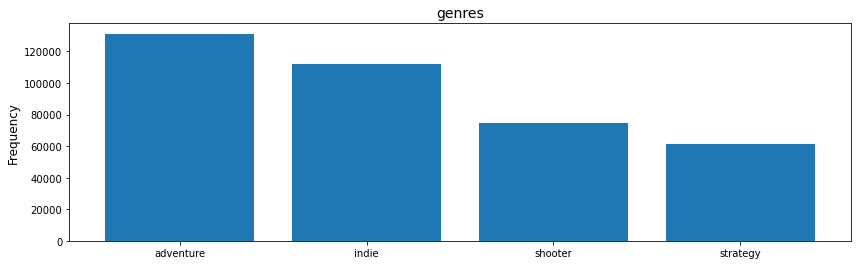

In [143]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["genres"]).value_counts().iloc[:4].index,
        to_1D(game_library["genres"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)



In [ ]:
# def test_functg(random_list):
#     if type(random_list) == list:
#         return [genres_dict[i] for i in random_list]
#     else:  
#         return ["Not_available"] 

In [115]:
import seaborn as sns

In [117]:
#sns.countplot(x='genres', data=game_library)b

# What themes are most common in this dataset 

In [118]:
to_1D(game_library["themes"])

0         adventure
1           shooter
2            puzzle
3         adventure
4             indie
            ...    
827122    simulator
827123    adventure
827124      shooter
827125     platform
827126    adventure
Length: 827127, dtype: object

In [119]:
to_1D(game_library["themes"]).value_counts()

adventure                    131209
indie                        112191
shooter                       74838
strategy                      61043
role-playing-rpg              57468
Not available                 53415
simulator                     52680
arcade                        45350
platform                      38650
puzzle                        38360
sport                         29833
hack-and-slash-beat-em-up     29319
fighting                      21602
racing                        18542
tactical                      17785
real-time-strategy-rts        10844
turn-based-strategy-tbs        8172
music                          8127
visual-novel                   5809
card-and-board-game            4221
point-and-click                3275
quiz-trivia                    2558
pinball                        1300
moba                            536
dtype: int64

Text(0.5, 1.0, 'genres')

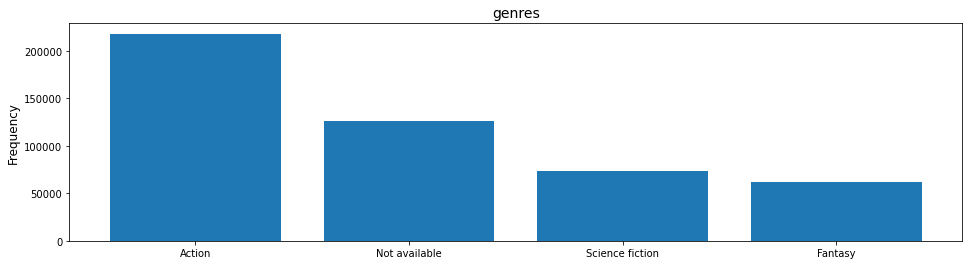

In [140]:
fig, ax = plt.subplots(figsize = (16,4))
ax.bar(to_1D(game_library["themes"]).value_counts().iloc[:4].index,
        to_1D(game_library["themes"]).value_counts().iloc[:4].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

In [127]:
game_library.head(3)

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0


In [126]:
game_library['campaigncoop'].fillna(False, inplace = True)
game_library['dropin'].fillna(False, inplace = True)
game_library['lancoop'].fillna(False, inplace = True)
game_library['offlinecoop'].fillna(False, inplace = True)
game_library['offlinemax'].fillna(0, inplace = True)
game_library['onlinecoop'].fillna(False, inplace = True)
game_library['splitscreen'].fillna(False, inplace = True)
game_library['offlinecoopmax'].fillna(0, inplace = True)
game_library['onlinecoopmax'].fillna(0, inplace = True)
game_library['onlinemax'].fillna(0, inplace = True)

In [129]:
pd.set_option('display.max_columns', None)
game_library.head(3)

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0


In [130]:
game_library.themes.value_counts()

[Not available]                                                           125790
[Action]                                                                   85954
[Action, Science fiction]                                                  24599
[Action, Fantasy]                                                          12760
[Fantasy]                                                                  12757
                                                                           ...  
[Action, Fantasy, Science fiction, Stealth, Comedy, Drama, Open world]         1
[Action, Science fiction, Open world, Romance]                                 1
[Action, Sandbox, Educational, Open world]                                     1
[Horror, Stealth, Kids, Mystery]                                               1
[Action, Science fiction, Horror, Thriller, Survival, Drama]                   1
Name: themes, Length: 1690, dtype: int64

#   land co-op

<AxesSubplot:xlabel='lancoop', ylabel='count'>

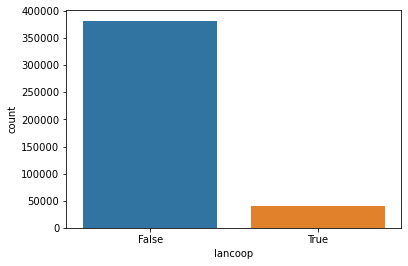

In [138]:
sns.countplot(x='lancoop', data=game_library)

# In a videogame what is the most common version titles ?

In [156]:
sns.countplot(x='version_title', data=game_library, order=game_library.version_title.value_counts().iloc[:4].index)

<AxesSubplot:xlabel='version_title', ylabel='count'>

ValueError: Image size of 389x156789 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [132]:
game_library.version_title.value_counts()

Gold Edition                                                         4734
Collector's Edition                                                  1334
Ultimate Edition                                                      591
Deluxe Edition                                                        578
Special Edition                                                       573
                                                                     ... 
Games Convention 2006 Edition                                           1
Special Luxury Version with Triple Suede Tapestry Limited Edition       1
Gunpla Figure Premium Edition                                           1
Year 3 Advanced Edition                                                 1
Lord's Edition                                                          1
Name: version_title, Length: 1524, dtype: int64

# What are the most common platforms ?

In [133]:
game_library.platforms.value_counts()

[Not available]                                                                                              85324
[PC (Microsoft Windows)]                                                                                     61558
[PC (Microsoft Windows), Mac]                                                                                 9989
[Linux, PC (Microsoft Windows), Mac]                                                                          9817
[PlayStation 3, Xbox 360]                                                                                     9810
                                                                                                             ...  
[Super Nintendo Entertainment System, Sega Mega Drive/Genesis, Game Boy, Sega Game Gear, Arcade, Sega CD]        1
[PlayStation, PlayStation 2, Xbox, Nintendo GameCube]                                                            1
[PC (Microsoft Windows), DOS, Mac, Amiga, Super Nintendo Entertainment System]  

In [134]:
to_1D(game_library["platforms"])

0                       Xbox One
1                Xbox Series X|S
2                         Arcade
3                   Nintendo 3DS
4         PC (Microsoft Windows)
                   ...          
944962                  Xbox One
944963      Legacy Mobile Device
944964             Windows Phone
944965    PC (Microsoft Windows)
944966                  Xbox One
Length: 944967, dtype: object

In [135]:
to_1D(game_library["platforms"]).value_counts()

PC (Microsoft Windows)    188652
Not available              85324
Xbox 360                   61765
Xbox One                   60892
PlayStation 4              60340
                           ...  
Donner Model 30                1
Analogue electronics           1
HP 3000                        1
DEC GT40                       1
PDP-1                          1
Length: 198, dtype: int64

Text(0.5, 1.0, 'genres')

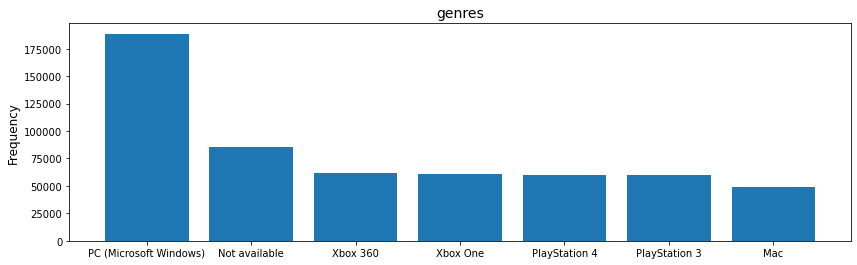

In [145]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [144]:
game_library.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
0,192310,"[63703, 63704]",[68886],0,210891.0,1646209573,"[2270833, 2272174, 2326733, 2591087]",1.645661e+09,[adventure],Martha Is Dead: Digital Deluxe,"[Xbox One, Xbox Series X|S]","[347234, 347235]","[742660, 742661, 742662, 742663]","[13189, 25646, 26565, 27266, 55282, 68271, 875...",martha-is-dead-digital-deluxe,Martha Is Dead is a dark first-person psycholo...,"[19, 268435487]",[Horror],1649248334,https://www.igdb.com/games/martha-is-dead-digi...,90714.0,Digital Deluxe,"[66181, 66182, 66183]","[266891, 266892, 266893, 266894, 266895, 26689...",4614628f-4b00-55b4-c79e-c1c466b9b9df,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
1,40104,NaN,NaN,0,NaN,1498435200,"[20127, 1988884]",5.364576e+08,[shooter],Dogou Souken,[Arcade],[91007],NaN,"[12364, 27270, 43367, 103281, 103292, 103298, ...",dogou-souken,An overhead-view shoot'em up game.,[268435461],[Not available],1604620800,https://www.igdb.com/games/dogou-souken,NaN,NaN,NaN,NaN,5e7446ff-58d9-e744-f0d3-5e10241304c1,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
2,85031,[37944],NaN,0,61466.0,1517392813,"[216805, 1969751, 2005770]",1.404346e+09,[puzzle],City Mysteries,[Nintendo 3DS],[138333],"[155025, 155026, 155027]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",city-mysteries,"Search buildings, streets, landmarks as you se...",[268435465],[Not available],1641425677,https://www.igdb.com/games/city-mysteries,NaN,NaN,NaN,NaN,87b342e7-b912-ca8d-4ffb-f91f9e4f1870,"[130531, 130532]",[Not available],[Not available],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
3,99234,NaN,NaN,0,91582.0,1524843905,"[603512, 1857496, 1917109]",1.527120e+09,"[adventure, indie]",Sword of the Black Stone,[PC (Microsoft Windows)],[188385],"[231528, 231529, 231530, 231531, 231532]","[25646, 29783, 68271, 80916, 96217, 105269, 10...",sword-of-the-black-stone,If your looking for action and adventure then ...,"[1, 268435487, 268435488]",[Action],1643857546,https://www.igdb.com/games/sword-of-the-black-...,NaN,NaN,NaN,[84617],0b575316-96dc-b056-86e0-c958c1c95efb,"[155850, 155852]",[single-player],[Third person],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
4,148930,NaN,[33736],0,169077.0,1621959514,"[2052375, 2057300]",NaN,"[simulator, strategy, adventure, indie]",Bok-Bok: A Chicken Dating Sim,[Not available],NaN,"[463145, 463148, 463149, 463151, 463152]","[25311, 26145, 28277, 33603, 51577, 65827, 791...",bok-bok-a-chicken-dating-sim,Have you ever pondered what the romantic life ...,"[268435469, 268435471, 268435487, 268435488]",[Not available],1643850601,https://www.igdb.com/games/bok-bok-a-chicken-d...,NaN,NaN,NaN

In [ ]:
to_1D(game_library["rating"])

In [147]:
game_library.rating.value_counts()

70.000000    14399
80.000000     9513
60.000000     9015
50.000000     7862
75.266945     7362
             ...  
79.833064        1
77.462189        1
65.882986        1
75.937458        1
73.392854        1
Name: rating, Length: 10448, dtype: int64

In [148]:
game_library.rating_count.value_counts()

0.0      28282
1.0      10423
2.0       7589
3.0       7442
381.0     7362
         ...  
240.0        1
589.0        1
249.0        1
242.0        1
341.0        1
Name: rating_count, Length: 560, dtype: int64

In [149]:
game_library.total_rating.value_counts()

70.000000    13171
60.000000     9221
79.704901     7362
80.000000     6847
50.000000     6450
             ...  
75.163377        1
46.187909        1
56.888889        1
64.444699        1
66.196427        1
Name: total_rating, Length: 11068, dtype: int64

In [193]:
#game_library.info()

In [151]:
#this is the dataframe that ONLY has ratings 
df2 = game_library[game_library['rating'].notnull()]
df2.head()


,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax
17,18248,"[8122, 8123]",NaN,0,201029.0,1457458737,"[30063, 130024, 1743759, 1921917]",1.271722e+09,[music],Beat City,[Nintendo DS],"[47952, 47953]","[740229, 740230]","[11711, 18981, 54774, 63933, 67774, 77720, 789...",beat-city,A rhythm-based mini-game collection for the DS...,"[1, 268435463, 536871080, 536871186, 536875049...",[Action],1652301864,https://www.igdb.com/games/beat-city,NaN,NaN,NaN,NaN,62fa1b35-b89c-e933-f820-ff2d3e21a2c9,"[164713, 164714]",[single-player],[Side view],NaN,NaN,"[168, 274, 4137, 4328]",NaN,60.00000,0.0,"Can you feel the beat? Life, color, and happin...",60.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
24,100789,[21881],NaN,0,NaN,1525651200,"[679587, 679684, 1991025]",NaN,"[sport, arcade]",Flying Arrow!.,[Not available],NaN,NaN,"[14733, 87053, 90965, 109606, 116349, 116350, ...",flying-arrow--1,Flying Arrow is a game control throw your arro...,"[268435470, 268435489]",[Not available],1604620800,https://www.igdb.com/games/flying-arrow--1,NaN,NaN,NaN,[78501],ecaba399-d6af-1a0a-5a4a-f1a08995382c,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,34.16185,0.0,NaN,34.16185,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
43,75935,NaN,NaN,0,106238.0,1510766425,"[190562, 1952309]",1.509494e+09,[indie],Boinks,"[PC (Microsoft Windows), Mac]","[128915, 128916]","[135401, 135402, 135403, 135404, 135405]","[32902, 40524, 76263, 96217, 105233, 106987, 1...",boinks,Populate the screen with the happy Boinks. Avo...,"[1, 268435488]",[Action],1643871827,https://www.igdb.com/games/boinks,NaN,NaN,NaN,[62201],ff9de860-ffc9-6014-e7f8-2ce0ff89132b,NaN,[single-player],[Not available],NaN,NaN,NaN,NaN,70.00000,0.0,NaN,70.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
48,88912,NaN,[74270],9,93117.0,1519382760,"[224818, 1999311, 2414235]",1.368576e+09,"[platform, arcade]",Sonic the Hedgehog Classic,"[Android, iOS]","[189309, 193673, 193674]","[206783, 206784, 206785, 206786, 206787, 20678...","[25901, 28070, 43367, 51485, 55042, 56033, 816...",sonic-the-hedgehog-classic,A remastered port of Sonic the Hedgehog for mo...,"[1, 268435464, 268435489, 536872420, 536882346...",[Action],1654793072,https://www.igdb.com/games/sonic-the-hedgehog-...,NaN,NaN,NaN,"[76549, 139109, 139110, 275708]",f307126e-0e1f-d216-cc9a-91ac6b740667,"[171549, 171550]",[single-player],[Side view],[89032],[881],"[1508, 11434, 17940, 24797]",NaN,80.00000,1.0,NaN,80.00000,1.0,NaN,2156.0,[457],NaN,[131033],3192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0
52,35350,NaN,NaN,0,32370.0,1495832682,"[8599, 104407, 1188861]",1.474589e+09,"[adventure, indie]",Vernon's Legacy,[PC (Microsoft Windows)],[81281],"[85128, 85129, 85130, 85131, 85132]","[13189, 18011, 19817, 25222, 25646, 27266, 552...",vernons-legacy,Vernon's Legacy is an horror adventure with an...,"[19, 268435487, 268435488, 

# Explore pt 2 

- more complicated Questions

# Do video games on certain platforms get better user ratings?


- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - MAC 
    - X-Box 360
    - ps 3 and 4 

In [209]:
#the diffrent platforms in the dataframe

Text(0.5, 1.0, 'platforms')

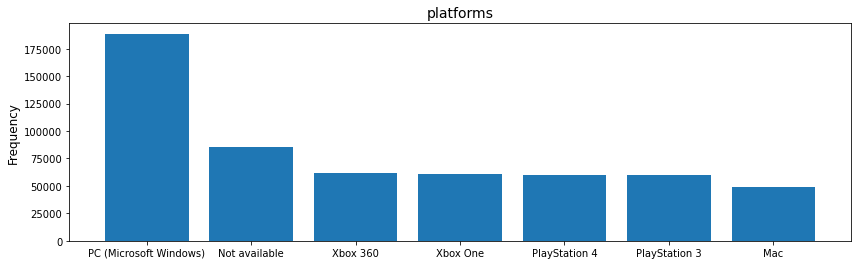

In [155]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(game_library["platforms"]).value_counts().iloc[:7].index,
        to_1D(game_library["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

>### changing ratings and changing to bins 

In [160]:
game_library.rating.value_counts()

70.000000    14399
80.000000     9513
60.000000     9015
50.000000     7862
75.266945     7362
             ...  
79.833064        1
77.462189        1
65.882986        1
75.937458        1
73.392854        1
Name: rating, Length: 10448, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

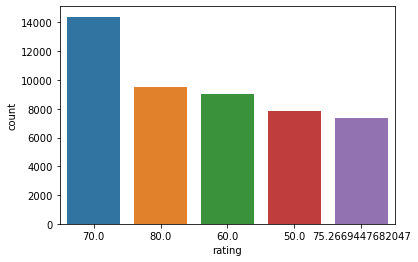

In [161]:
sns.countplot(x='rating', data=game_library, order=game_library.rating.value_counts().iloc[:5].index)

In [166]:
df2['rating_bin'] = pd.cut(df2.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])


/var/folders/f1/8blv52r50y1cffy2qpp05b5c0000gn/T/ipykernel_45744/1496619606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating_bin'] = pd.cut(df2.rating,


In [174]:
df2.rating_bin.head(2)

17            fair
24    unimpressive
Name: rating_bin, dtype: category
Categories (10, object): ['awful' < 'very_bad' < 'bad' < 'unimpressive' ... 'alright' < 'good' < 'great' < 'subperb']

<AxesSubplot:xlabel='rating_bin', ylabel='count'>

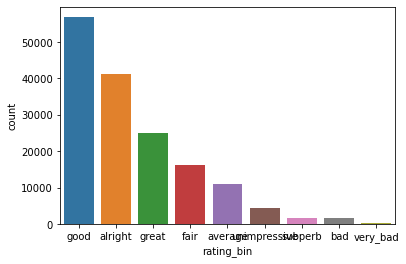

In [172]:
sns.countplot(x='rating_bin', data=df2, order=df2.rating_bin.value_counts().iloc[:9].index)

## Exploring `good rating`

In [175]:
df_good_rating = df2[df2['rating_bin']== 'good']
df_good_rating.head()

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
48,88912,NaN,[74270],9,93117.0,1519382760,"[224818, 1999311, 2414235]",1.368576e+09,"[platform, arcade]",Sonic the Hedgehog Classic,"[Android, iOS]","[189309, 193673, 193674]","[206783, 206784, 206785, 206786, 206787, 20678...","[25901, 28070, 43367, 51485, 55042, 56033, 816...",sonic-the-hedgehog-classic,A remastered port of Sonic the Hedgehog for mo...,"[1, 268435464, 268435489, 536872420, 536882346...",[Action],1654793072,https://www.igdb.com/games/sonic-the-hedgehog-...,NaN,NaN,NaN,"[76549, 139109, 139110, 275708]",f307126e-0e1f-d216-cc9a-91ac6b740667,"[171549, 171550]",[single-player],[Side view],[89032],[881],"[1508, 11434, 17940, 24797]",NaN,80.000000,1.0,NaN,80.000000,1.0,NaN,2156.0,[457],NaN,[131033],3192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,good
532,9231,[93014],NaN,0,229006.0,1425857558,"[16692, 155717, 247073, 1302974, 2588901]",5.679072e+08,"[role-playing-rpg, simulator, strategy, advent...",Sid Meier's Pirates!,"[DOS, Mac, Commodore C64/128/MAX, Amiga, Ninte...","[34603, 87797, 87798, 87799, 87800, 87801, 878...","[135926, 307553, 307554]","[5982, 9243, 24765, 25311, 26145, 26574, 27092...",sid-meiers-pirates,You'll criss-cross your way along the 17th cen...,"[1, 22, 268435468, 268435469, 268435471, 26843...","[Action, Historical]",1663749218,https://www.igdb.com/games/sid-meiers-pirates,NaN,NaN,NaN,"[128282, 128283, 128284, 128285, 128286]",c7e8340d-71c8-89a6-ce80-22dab66c6d28,"[51323, 51324, 51325]",[single-player],"[Third person, Bird view / Isometric, Side view]",[4399],NaN,"[4, 358, 705, 846, 993, 1026, 1027, 1148, 1632...",NaN,72.206642,29.0,NaN,71.603321,34.0,NaN,1244.0,NaN,5.0,NaN,NaN,NaN,71.000000,5.0,NaN,[868],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,good
1139,95231,NaN,NaN,0,NaN,1521820653,"[337113, 1963449, 2122818]",1.284077e+09,[Not available],Roulette 3D,[iOS],[317666],NaN,NaN,roulette-3d,"Whether you’re a newbie or a pro, learn lots o...",NaN,[Not available],1633525509,https://www.igdb.com/games/roulette-3d,NaN,NaN,NaN,"[233851, 233852]",68de9758-f49b-cec1-3bae-ecd456b68c8d,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,80.000000,0.0,NaN,80.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,good
1155,7229,"[48325, 67876]",NaN,0,161056.0,1401819273,"[25405, 84254, 124806, 214327, 251305, 1302559...",1.329178e+09,"[fighting, sport]",UFC Undisputed 3,"[PlayStation 3, Xbox 360]","[18497, 18499, 106641, 106642]",[29007],"[2265, 2807, 7100, 7165, 7227, 7228, 11423, 28...",ufc-undisputed-3,The critically acclaimed and best-selling MMA ...,"[268435460, 268435470, 536870973, 536871019, 5...",[Not available],1651772564,https://www.igdb.com/games/ufc-undisputed-3,NaN,NaN,NaN,NaN,665b29c8-6b8b-b407-817a-6279125c3bfd,"[17103, 17104]","[single-player, multiplayer, split-screen]",[Not available],NaN,NaN,"[61, 107, 129, 711, 771, 1086, 1166, 1293, 413...",NaN,70.754153,9.0,NaN,77.662791,18.0,NaN,687.0,[249],1.0,NaN,NaN,249.0,84.571429,9.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df_good_rating.head()

Text(0.5, 1.0, 'platforms')

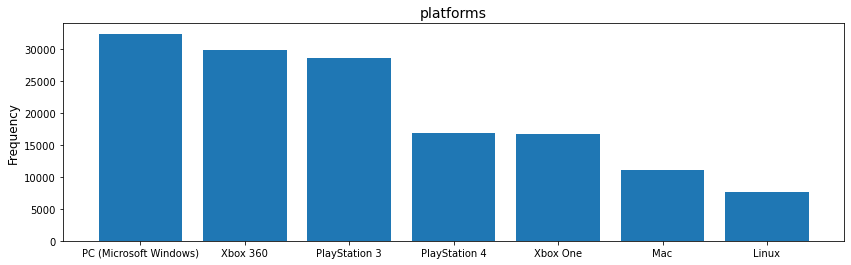

In [176]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_good_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- for the ratings "good" the most used platforms is (in order) pc, xbox 360, ps3, ps4

##  Exploring `suberb raitng`

In [183]:
df_subperb_rating = df2[df2['rating_bin']== 'subperb']
df_subperb_rating.head(3)

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
538,5514,"[63329, 64816]",NaN,0,5590.0,1394050493,"[39269, 117614, 219145, 1923354]",1.259107e+09,"[puzzle, adventure]",Mystery Case Files: Dire Grove,"[PC (Microsoft Windows), Mac, Nintendo 3DS, iOS]","[13356, 13357, 13358, 13359, 141663, 141664]","[166740, 166741, 166742, 166743]","[18011, 20342, 24426, 25222, 26223, 54678, 551...",mystery-case-files-dire-grove,Mystery Case Files: Dire Grove is an interacti...,"[268435465, 268435487, 536871939, 536873787, 5...",[Not available],1649944047,https://www.igdb.com/games/mystery-case-files-...,NaN,NaN,NaN,[1238],692adc27-007f-58d4-000b-a3e9c2c5d7b2,"[13361, 13362, 130159]",[single-player],"[First person, Bird view / Isometric]",[1539],NaN,"[1027, 2875, 4134, 4517, 5751]",NaN,93.066667,8.0,This story takes place directly after the even...,93.066667,8.0,NaN,747.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb
3891,103340,"[40984, 84252]",[15815],4,101098.0,1528819898,"[1593963, 1614886, 1698068, 1929264, 1931087, ...",1.536883e+09,[role-playing-rpg],Xenoblade Chronicles 2: Torna - The Golden Cou...,[Nintendo Switch],"[154499, 250809]","[214627, 214628, 214629, 214630, 214631, 21463...","[25636, 54775, 57372, 81249, 96217, 103303, 10...",xenoblade-chronicles-2-torna-the-golden-country,Guide a group of legendary warriors on a journ...,"[1, 268435468, 536871433]",[Action],1661290066,https://www.igdb.com/games/xenoblade-chronicle...,NaN,NaN,[20650],[80498],9c1cde21-29f8-531d-ed96-7fed5f11dc44,"[65880, 65881]",[single-player],[Third person],[97100],NaN,[521],NaN,92.480943,23.0,NaN,86.990471,27.0,NaN,1161.0,[943],4.0,NaN,26766.0,NaN,81.500,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb
5505,26834,"[14181, 36471]",[21026],0,88375.0,1484754969,"[109558, 198354, 370643, 1843258, 1934786, 193...",1.474416e+09,"[role-playing-rpg, simulator, strategy, tactic...",Utawarerumono: Mask of Truth,"[PC (Microsoft Windows), PlayStation 3, PlaySt...","[64411, 64412, 64413, 112202, 112203, 135120, ...","[122800, 122801, 122802, 122803]","[7615, 13196, 19404, 25311, 25921, 26574, 2709...",utawarerumono-mask-of-truth,"""The epic story of Utawarerumono comes to an e...","[17, 268435468, 268435469, 268435471, 26843548...",[Fantasy],1662392530,https://www.igdb.com/games/utawarerumono-mask-...,NaN,NaN,"[11751, 14382, 15704, 15705]","[11566, 56287, 128303, 129178]",ca768c89-2ef5-aeb3-707f-1a6c91874027,"[43748, 43749, 43750]",[single-player],"[Bird view / Isometric, Text]","[62646, 62647]",NaN,"[78, 296, 2399, 3782]",NaN,90.061776,18.0,"""...I leave Her Highness... in your hads.""\n""N...",83.468388,27.0,NaN,1764.0,[1248],1.0,NaN,NaN,NaN,76.875,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb


> ### Most frequent platforms in the raiting `subperb`

Text(0.5, 1.0, 'platforms')

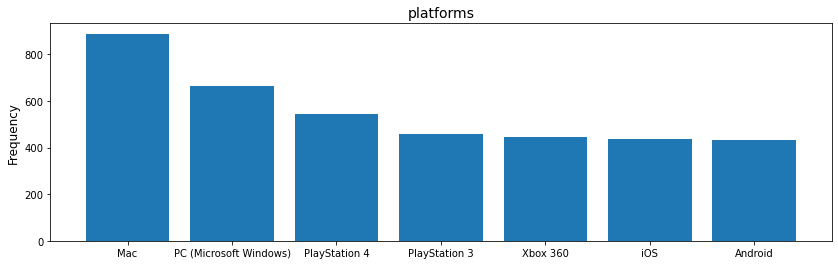

In [184]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- suberb rating is mostly mac and PC top two, and mest three are ps4 and ps3.

## Exploring `great rating`

In [185]:
df_great_rating = df2[df2['rating_bin']== 'great']
df_great_rating.head(3)

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
1817,12765,NaN,NaN,0,12607.0,1442651409,"[21872, 155505, 1720153, 1866792]",5.285088e+08,[puzzle],Shanghai,"[Commodore C64/128/MAX, Amiga, Nintendo Entert...","[36580, 36581, 36582, 43587, 158109, 158111, 1...","[19496, 336419, 336420, 336421]","[10603, 19222, 25905, 41349, 86974, 87507, 885...",shanghai,Shanghai is a computerized version of mahjong ...,"[268435465, 536871923, 536872616, 536872814]",[Not available],1658383618,https://www.igdb.com/games/shanghai,NaN,NaN,[28795],[88293],725e6251-8697-0beb-8533-83db526a80e6,"[27367, 85794, 85795]","[single-player, multiplayer]",[Bird view / Isometric],NaN,NaN,"[1011, 1704, 1902]",NaN,89.785588,11.0,NaN,89.785588,11.0,NaN,1691.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,great
1844,87270,NaN,NaN,0,63736.0,1518652800,"[231982, 1366411, 1981611]",1.482192e+09,"[puzzle, adventure]",Rescue the Enchanter,[iOS],[148599],"[192998, 192999, 193000, 193001, 193002]","[236, 25646, 27266, 27725, 95776, 106992, 1091...",rescue-the-enchanter,Continue the adventure of The Enchanted Books ...,"[268435465, 268435487]",[Not available],1604620800,https://www.igdb.com/games/rescue-the-enchanter,NaN,NaN,NaN,"[73155, 73164]",5ba6f7c3-dad3-63c2-becd-0f373971be14,NaN,[Not available],[Not available],NaN,NaN,NaN,NaN,90.000000,0.0,NaN,90.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,great
2129,88931,NaN,NaN,0,64511.0,1519391924,"[224912, 1948406]",1.508285e+09,[role-playing-rpg],My Town: Best Friends' House,[iOS],[149937],"[205713, 205714, 205715, 205716, 205717, 20571...","[25636, 35737, 49414, 51213, 56036, 94981, 991...",my-town-best-friends-house,What is more fun than spending the day with yo...,"[268435468, 536872030]",[Not available],1609930611,https://www.igdb.com/games/my-town-best-friend...,NaN,NaN,NaN,[76380],722ffba2-e83f-aedf-faed-2e38a63c7781,NaN,[Not available],[Not available],NaN,NaN,[1118],NaN,90.000000,0.0,NaN,90.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,great


Text(0.5, 1.0, 'platforms')

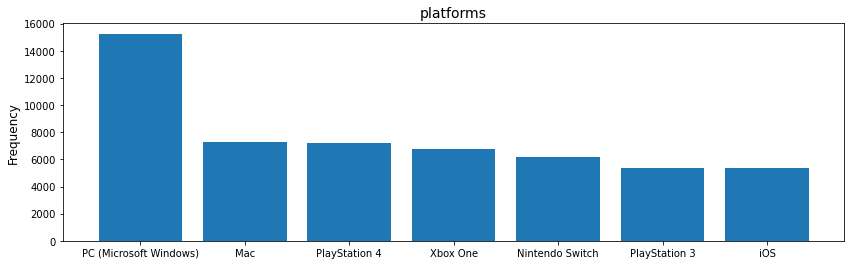

In [186]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

In [207]:

df_top3_rating = df2[(df2['rating_bin']== 'great') | (df2['rating_bin']== 'good') | (df2['rating_bin']== 'subperb')]
df_top3_rating.head(3)

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
48,88912,NaN,[74270],9,93117.0,1519382760,"[224818, 1999311, 2414235]",1.368576e+09,"[platform, arcade]",Sonic the Hedgehog Classic,"[Android, iOS]","[189309, 193673, 193674]","[206783, 206784, 206785, 206786, 206787, 20678...","[25901, 28070, 43367, 51485, 55042, 56033, 816...",sonic-the-hedgehog-classic,A remastered port of Sonic the Hedgehog for mo...,"[1, 268435464, 268435489, 536872420, 536882346...",[Action],1654793072,https://www.igdb.com/games/sonic-the-hedgehog-...,NaN,NaN,NaN,"[76549, 139109, 139110, 275708]",f307126e-0e1f-d216-cc9a-91ac6b740667,"[171549, 171550]",[single-player],[Side view],[89032],[881],"[1508, 11434, 17940, 24797]",NaN,80.000000,1.0,NaN,80.000000,1.0,NaN,2156.0,[457],NaN,[131033],3192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,good
532,9231,[93014],NaN,0,229006.0,1425857558,"[16692, 155717, 247073, 1302974, 2588901]",5.679072e+08,"[role-playing-rpg, simulator, strategy, advent...",Sid Meier's Pirates!,"[DOS, Mac, Commodore C64/128/MAX, Amiga, Ninte...","[34603, 87797, 87798, 87799, 87800, 87801, 878...","[135926, 307553, 307554]","[5982, 9243, 24765, 25311, 26145, 26574, 27092...",sid-meiers-pirates,You'll criss-cross your way along the 17th cen...,"[1, 22, 268435468, 268435469, 268435471, 26843...","[Action, Historical]",1663749218,https://www.igdb.com/games/sid-meiers-pirates,NaN,NaN,NaN,"[128282, 128283, 128284, 128285, 128286]",c7e8340d-71c8-89a6-ce80-22dab66c6d28,"[51323, 51324, 51325]",[single-player],"[Third person, Bird view / Isometric, Side view]",[4399],NaN,"[4, 358, 705, 846, 993, 1026, 1027, 1148, 1632...",NaN,72.206642,29.0,NaN,71.603321,34.0,NaN,1244.0,NaN,5.0,NaN,NaN,NaN,71.0,5.0,NaN,[868],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,good
538,5514,"[63329, 64816]",NaN,0,5590.0,1394050493,"[39269, 117614, 219145, 1923354]",1.259107e+09,"[puzzle, adventure]",Mystery Case Files: Dire Grove,"[PC (Microsoft Windows), Mac, Nintendo 3DS, iOS]","[13356, 13357, 13358, 13359, 141663, 141664]","[166740, 166741, 166742, 166743]","[18011, 20342, 24426, 25222, 26223, 54678, 551...",mystery-case-files-dire-grove,Mystery Case Files: Dire Grove is an interacti...,"[268435465, 268435487, 536871939, 536873787, 5...",[Not available],1649944047,https://www.igdb.com/games/mystery-case-files-...,NaN,NaN,NaN,[1238],692adc27-007f-58d4-000b-a3e9c2c5d7b2,"[13361, 13362, 130159]",[single-player],"[First person, Bird view / Isometric]",[1539],NaN,"[1027, 2875, 4134, 4517, 5751]",NaN,93.066667,8.0,This story takes place directly after the even...,93.066667,8.0,NaN,747.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb


## These are the top 7 platforms for the three best ratings (good, great, subperb)

Text(0.5, 1.0, 'platforms')

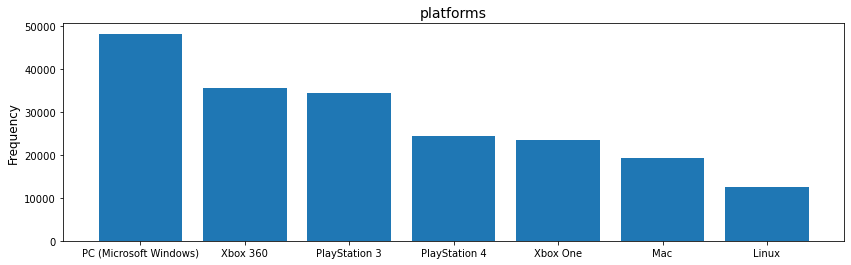

In [208]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["platforms"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("platforms", size = 14)

- Yes it looks like for the games in the three highest member ratings (good, great,subperb) the majority of those games are played on 
    - PC(microsoft Windows)
    - X-Box 360
    - ps 3 and 4 
    - X-box 1

# Q2- what is the most common genre in games that are `subperb` (the highest rating)

- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

In [191]:
df_subperb_rating

,id,age_ratings,artworks,category,cover,created_at,external_games,first_release_date,genres,name,platforms,release_dates,screenshots,similar_games,slug,summary,tags,themes,updated_at,url,version_parent,version_title,videos,websites,checksum_x,involved_companies,game_modes,player_perspectives,alternative_names,game_engines,keywords,status,rating,rating_count,storyline,total_rating,total_rating_count,hypes,collection,franchises,follows,bundles,parent_game,franchise,aggregated_rating,aggregated_rating_count,multiplayer_modes,remakes,dlcs,ports,expansions,expanded_games,remasters,forks,standalone_expansions,second,version_description,title_version,second_id,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,platform,splitscreen,checksum_y,offlinecoopmax,onlinecoopmax,onlinemax,rating_bin
538,5514,"[63329, 64816]",NaN,0,5590.0,1394050493,"[39269, 117614, 219145, 1923354]",1.259107e+09,"[puzzle, adventure]",Mystery Case Files: Dire Grove,"[PC (Microsoft Windows), Mac, Nintendo 3DS, iOS]","[13356, 13357, 13358, 13359, 141663, 141664]","[166740, 166741, 166742, 166743]","[18011, 20342, 24426, 25222, 26223, 54678, 551...",mystery-case-files-dire-grove,Mystery Case Files: Dire Grove is an interacti...,"[268435465, 268435487, 536871939, 536873787, 5...",[Not available],1649944047,https://www.igdb.com/games/mystery-case-files-...,NaN,NaN,NaN,[1238],692adc27-007f-58d4-000b-a3e9c2c5d7b2,"[13361, 13362, 130159]",[single-player],"[First person, Bird view / Isometric]",[1539],NaN,"[1027, 2875, 4134, 4517, 5751]",NaN,93.066667,8.0,This story takes place directly after the even...,93.066667,8.0,NaN,747.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb
3891,103340,"[40984, 84252]",[15815],4,101098.0,1528819898,"[1593963, 1614886, 1698068, 1929264, 1931087, ...",1.536883e+09,[role-playing-rpg],Xenoblade Chronicles 2: Torna - The Golden Cou...,[Nintendo Switch],"[154499, 250809]","[214627, 214628, 214629, 214630, 214631, 21463...","[25636, 54775, 57372, 81249, 96217, 103303, 10...",xenoblade-chronicles-2-torna-the-golden-country,Guide a group of legendary warriors on a journ...,"[1, 268435468, 536871433]",[Action],1661290066,https://www.igdb.com/games/xenoblade-chronicle...,NaN,NaN,[20650],[80498],9c1cde21-29f8-531d-ed96-7fed5f11dc44,"[65880, 65881]",[single-player],[Third person],[97100],NaN,[521],NaN,92.480943,23.0,NaN,86.990471,27.0,NaN,1161.0,[943],4.0,NaN,26766.0,NaN,81.500000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb
5505,26834,"[14181, 36471]",[21026],0,88375.0,1484754969,"[109558, 198354, 370643, 1843258, 1934786, 193...",1.474416e+09,"[role-playing-rpg, simulator, strategy, tactic...",Utawarerumono: Mask of Truth,"[PC (Microsoft Windows), PlayStation 3, PlaySt...","[64411, 64412, 64413, 112202, 112203, 135120, ...","[122800, 122801, 122802, 122803]","[7615, 13196, 19404, 25311, 25921, 26574, 2709...",utawarerumono-mask-of-truth,"""The epic story of Utawarerumono comes to an e...","[17, 268435468, 268435469, 268435471, 26843548...",[Fantasy],1662392530,https://www.igdb.com/games/utawarerumono-mask-...,NaN,NaN,"[11751, 14382, 15704, 15705]","[11566, 56287, 128303, 129178]",ca768c89-2ef5-aeb3-707f-1a6c91874027,"[43748, 43749, 43750]",[single-player],"[Bird view / Isometric, Text]","[62646, 62647]",NaN,"[78, 296, 2399, 3782]",NaN,90.061776,18.0,"""...I leave Her Highness... in your hads.""\n""N...",83.468388,27.0,NaN,1764.0,[1248],1.0,NaN,NaN,NaN,76.875000,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,0.0,False,NaN,False,NaN,0.0,0.0,0.0,subperb
8313,1780,"[7695, 47758]",[4557],0,93463.0,1352061245,"[28918, 138479, 246544, 382168]",1.184198e+09,"[shooter, platform, adventure]",Mega Man ZX Advent,[Nintendo DS],"[40178, 40179, 40180, 40181]","[26958, 396090, 396091, 396092]","[1742, 1743, 1744, 1745, 1776, 1779, 3222, 181..

Text(0.5, 1.0, 'genre')

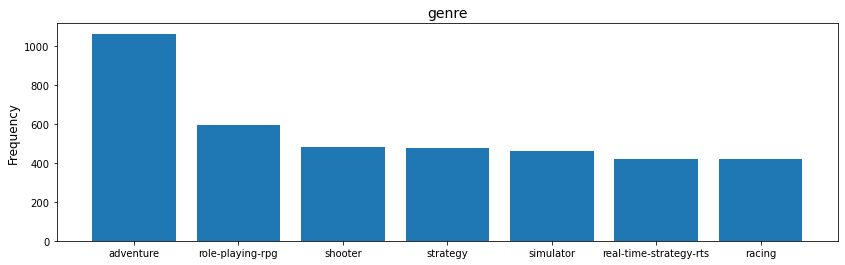

In [210]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_subperb_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genre", size = 14)

>- Answer- the most common Genre in the higest rating are adventure, role-playing- rpg, shoter, rts, racing 

## Q 2.1 what about the three highest ratings (good, great, subperb) ? what is the overall most highest genre

Text(0.5, 1.0, 'genres')

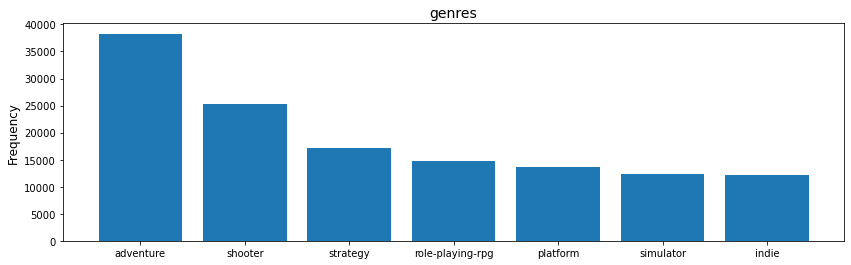

In [211]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["genres"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("genres", size = 14)

# Q3- what is the most common theme in games that are subperb (the highest rating)

Answer - the most common themes in the subperb is action, fantasy, science fiction, historical.

Text(0.5, 1.0, 'themes')

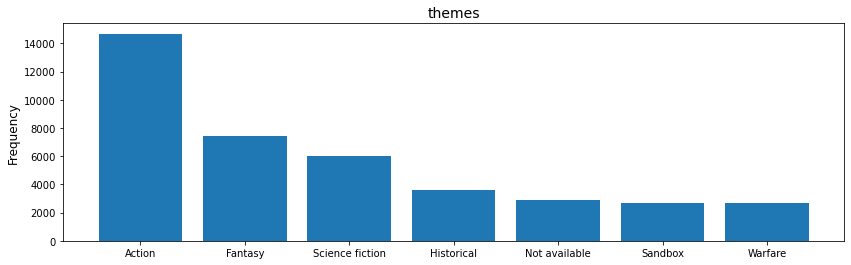

In [212]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_great_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_great_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("themes", size = 14)

## Q3.1- what is the most common theme in games that are three highest ratings (good, great, subperb)?

Text(0.5, 1.0, 'Themes')

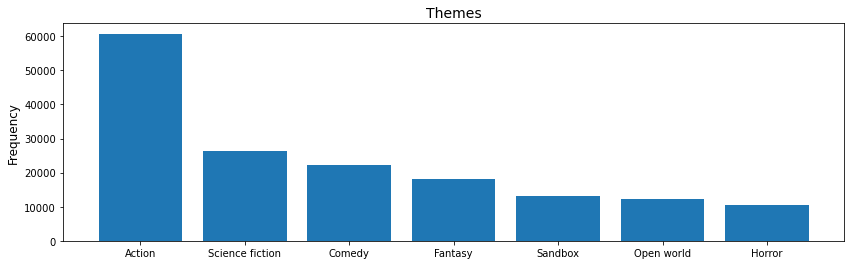

In [213]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].index,
        to_1D(df_top3_rating["themes"]).value_counts().iloc[:7].values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Themes", size = 14)

# Q4-  Do users rate games with online multiplayer modes higher than games that lack online multiplayer modes?

In [152]:
df3 = game_library[game_library['rating'].isnull()]
df3.shape

(264444, 71)

### Read the CSV for games 

In [ ]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
game_library.shape

In [ ]:
game_library = game_library.drop(columns=['websites', 'created_at', 'updated_at', 'artworks', 'cover','screenshots', 'videos', 'checksum', 'alternative_names', 'rating_count', 'total_rating_count', 'version_parent', 'hypes', 'franchises', 'follows', 'aggregated_rating_count'])
game_library.shape

In [ ]:
game_library.shape

In [ ]:
game_library.rename(columns={'slug': 'lower_case_name', 'aggregated_rating': 'critic_rating'}, inplace=True)
game_library.head()

### Dataframe with ratings

In [ ]:
df2 = df[df['rating'].notnull()]
df2.head()

In [ ]:
df2.rating.isnull().sum()

### Dataframe with nulls in rating column 

In [ ]:
df3 = df[df['rating'].isnull()]
df3.shape